Achtung: Diese Beispiel ist eine modifizierte Version von https://github.com/nmayorov/allan-variance

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from allan_variance import allan_variance, params_from_avar

Eine Hilfsfunktion zum Erzeugen unterschiedlicher Prozessrausch-Typen

In [34]:
def generate_signal(n, dt, q_white, q_walk, q_ramp, random_state=0):
    rng = np.random.RandomState(random_state)
    white = q_white * rng.randn(n) * dt ** 0.5
    walk = q_walk * dt ** 0.5 * np.cumsum(rng.randn(n))    
    ramp = q_ramp * dt * np.arange(n)
    return white + walk * dt + ramp * dt

In [35]:
dt = 1e-3

In [54]:
#x = generate_signal(1000000, dt, 0.1, 0.05, 0.002)
x = generate_signal(1000000, dt, 0.0, 0.0, 0.001)

Wir plotten einmal die Zeitserie

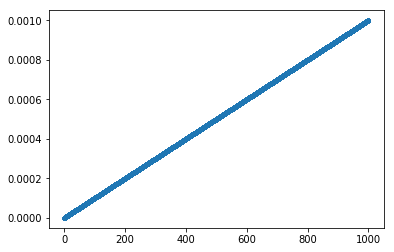

In [55]:
plt.plot(dt*np.arange(0,1000000),x, '.')

Zunächst berechnen wir die `allan_variance`

In [56]:
tau, av = allan_variance(x, dt)

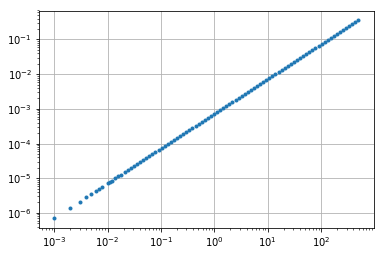

In [57]:
plt.loglog(tau, np.sqrt(av), '.')
plt.grid()